In [1]:
import pandas as pd
import numpy as np

# importing csv dataset into pandas dataframe

data = pd.read_csv('data.csv')


In [2]:
# replacing question marks in dataset with NaN and setting datatypes for 2 of the columns

data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

<AxesSubplot:xlabel='survived', ylabel='fare'>

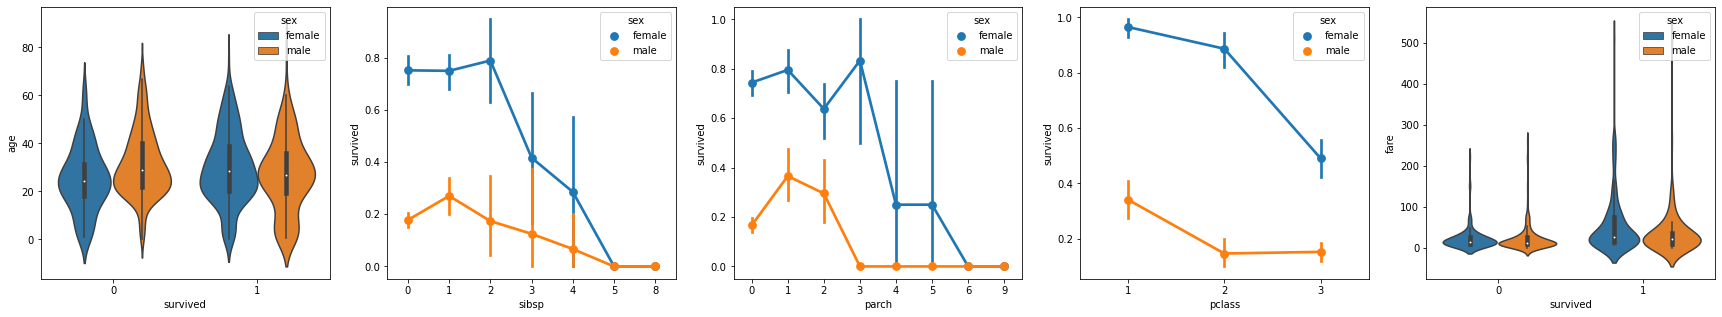

In [6]:
# using seaborn and matplotlib to visualise correlations in the dataset

import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [7]:
data.replace({'male': 1, 'female': 0}, inplace=True )
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [9]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [15]:
data = data[['sex','pclass','age','relatives','fare','survived']].dropna()
data.corr().abs()[["survived"]]

,survived
sex,0.537719
pclass,0.319979
age,0.053958
relatives,0.206754
fare,0.249164
survived,1.000000


In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

In [14]:
from keras.models import Sequential
from keras.layers import Dense

# Setting up the neural network

model = Sequential()

model.add(Dense(5,activation='relu',kernel_initializer='uniform',input_shape=(5,)))
model.add(Dense(5,activation='relu',kernel_initializer='uniform'))
model.add(Dense(1,activation='sigmoid',kernel_initializer='uniform'))

model.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
836/836 [==============================] - 2s 2ms/step - loss: 0.6922 - accuracy: 0.5849
Epoch 2/50
836/836 [==============================] - 0s 35us/step - loss: 0.6897 - accuracy: 0.5861
Epoch 3/50
836/836 [==============================] - 0s 40us/step - loss: 0.6851 - accuracy: 0.5873
Epoch 4/50
836/836 [==============================] - 0s 41us/step - loss: 0.6762 - accuracy: 0.6543
Epoch 5/50
836/836 [==============================] - 0s 39us/step - loss: 0.6617 - accuracy: 0.7620
Epoch 6/50
836/836 [==============================] - 0s 39us/step - loss: 0.6397 - accuracy: 0.7751
Epoch 7/50
836/836 [==============================] - 0s 38us/step - loss: 0.6127 - accuracy: 0.7727
Epoch 8/50
836/836 [==============================] - 0s 39us/step - loss: 0.5833 - accuracy: 0.7763
Epoch 9/50
836/836 [==============================] - 0s 39us/step - loss: 0.5560 - accuracy: 0.7751
Epoch 10/50
836/836 [==============================] - 0s 41us/step - loss: 0.5325 - accurac

In [22]:
from sklearn import metrics

y_pred = model.predict_classes(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7990430622009569
